# Marketing Campaign

From [Kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis/version/1)

Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from statsmodels.regression import linear_model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from scipy import stats
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
# While loading file need to specify the separator as tab character or whitespace
df = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
# Convert Dt_Customer to datetime object
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

We have 29 columns, most of them integer




Check for Null values

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df[df['Income'].isna() == True]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-05-11,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-11-07,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Check for Duplicated rown

In [8]:
 df.dropna(inplace = True)

In [9]:
df.shape

(2216, 29)

In [10]:
df.T.duplicated().sum()

0

## Numeric Columns

Let's look at the statistic of the numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [12]:
df['age'] = 2017 - df['Year_Birth']
df.drop(columns=['Year_Birth'], inplace=True)

In [13]:
list_to_plot = df.select_dtypes(include=np.number).columns.tolist()

In [14]:
to_remove = ['ID', 'Z_CostContact']
for item in to_remove:
    list_to_plot.remove(item)

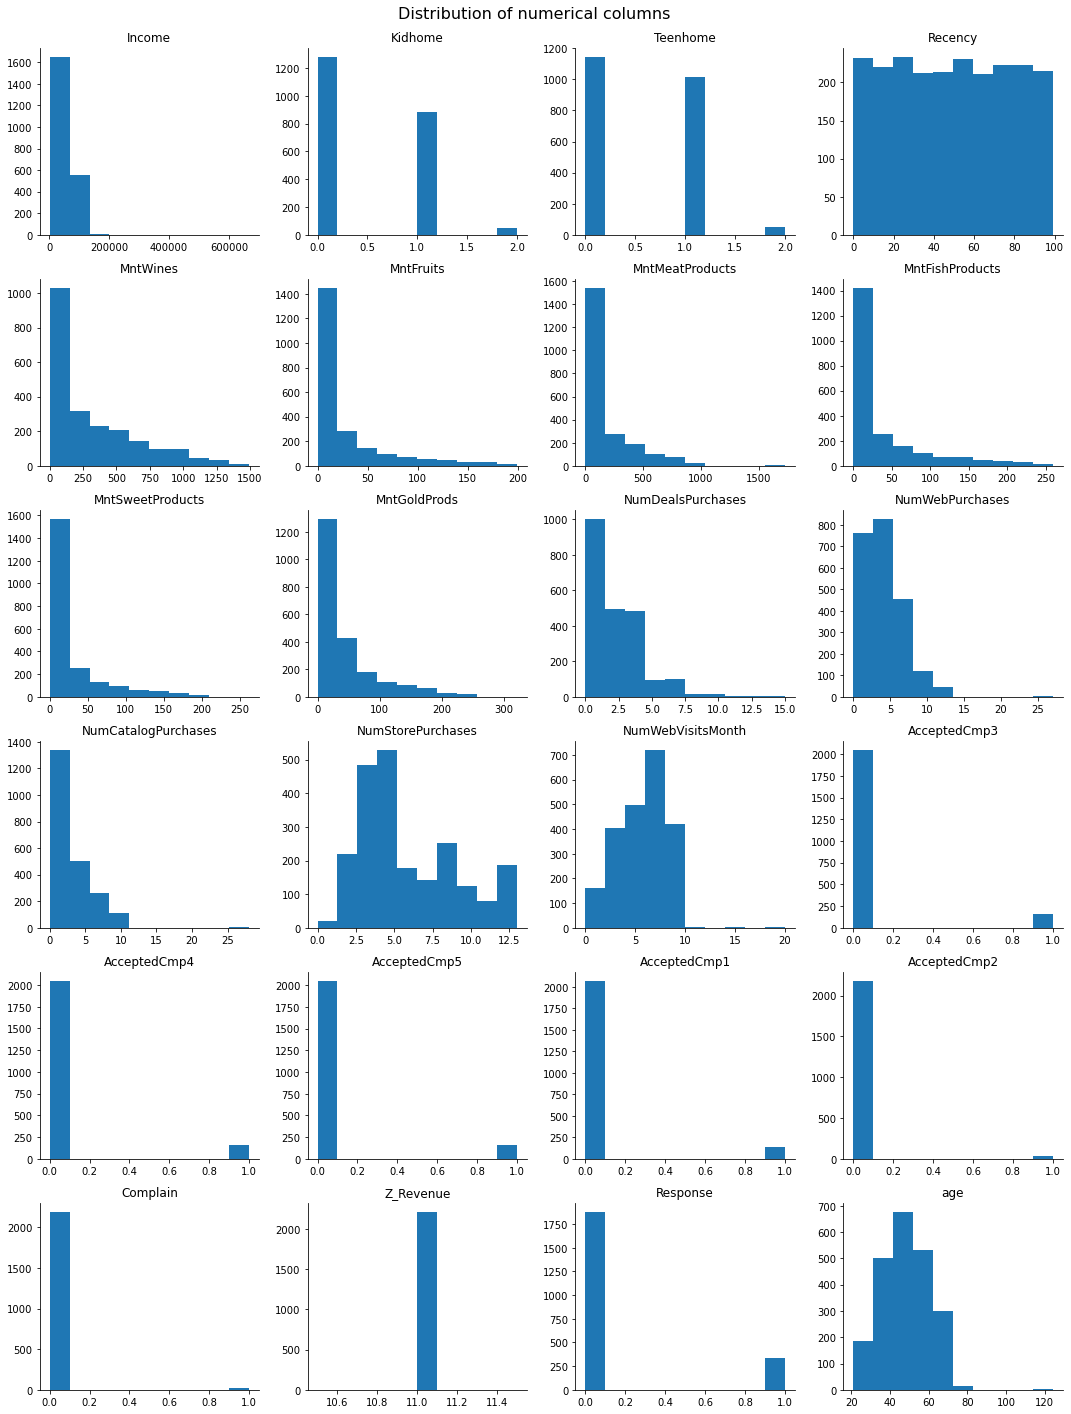

In [15]:
fig, axes = plt.subplots(6, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].hist(df[column])
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
to_remove = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response']
for item in to_remove:
    list_to_plot.remove(item)

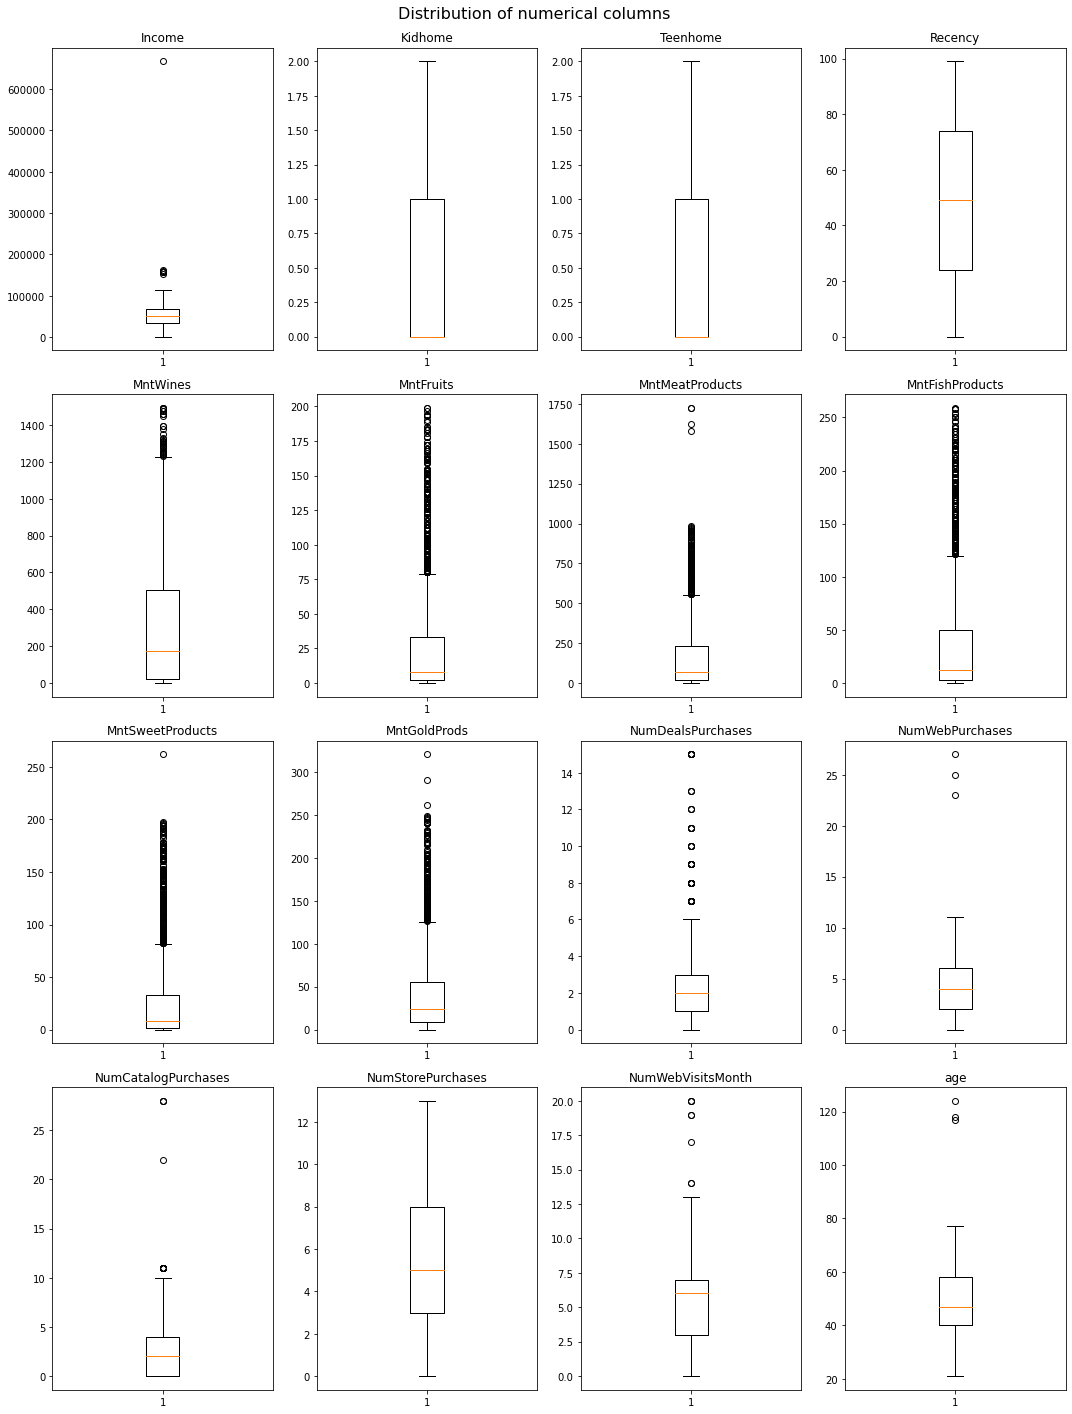

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].boxplot(df[column])
    axes[idx].set_title(column)
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

## Categorical columns

In [18]:
df.drop(index=df[df['Marital_Status'] == 'YOLO'].index, inplace=True)
df.drop(index=df[df['Marital_Status'] == 'Absurd'].index, inplace=True)

In [19]:
df['Education'] = np.where(df['Education'] == '2n Cycle', 'Master', df['Education'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Together', 'Married', df['Marital_Status'])
df['Marital_Status'] = np.where(df['Marital_Status'] == 'Alone', 'Single', df['Marital_Status'])

In [20]:
categorical_columns = df.select_dtypes(include="object_").columns.tolist()

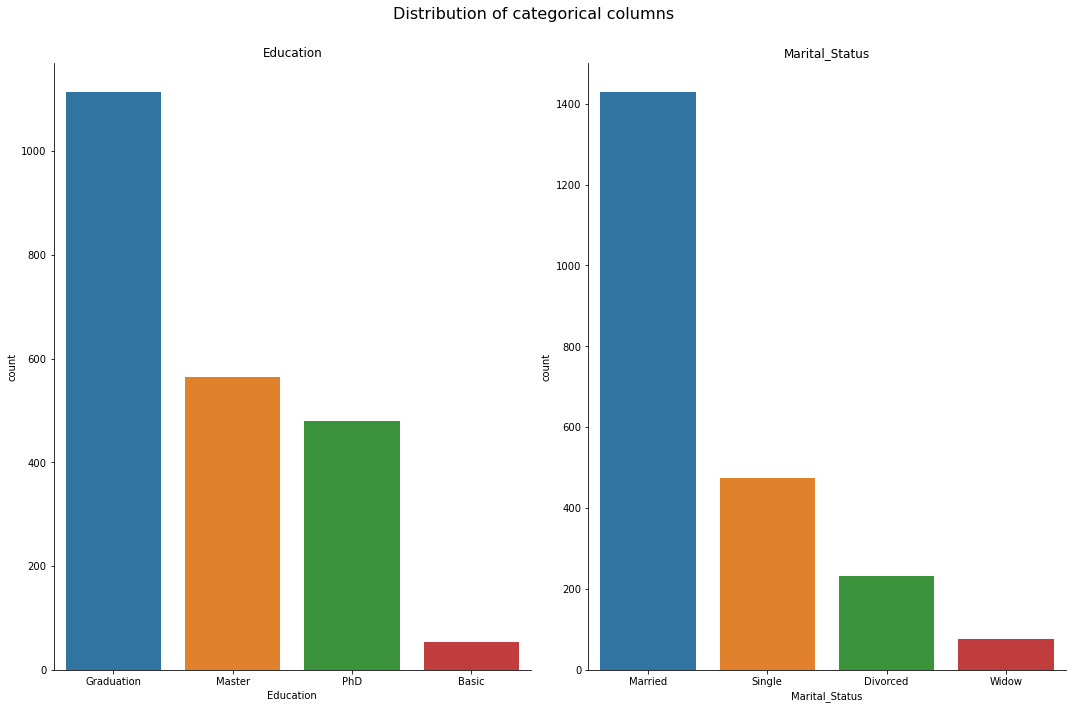

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.flatten()
for idx, column in enumerate(categorical_columns):
    #axes[idx].bar(x=df[column].value_counts().index, height=df[column].value_counts())
    sns.countplot(ax=axes[idx], x=column, data=df, order=df[column].value_counts().index)
    axes[idx].set_title(column)
    sns.despine()
fig.suptitle('Distribution of categorical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

Let's now try to get some insights from this categories

In [22]:
categories_for_insight = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

In [23]:
serie = pd.Series(index=df['Dt_Customer'], dtype='int')
temp = serie.resample('M').count()

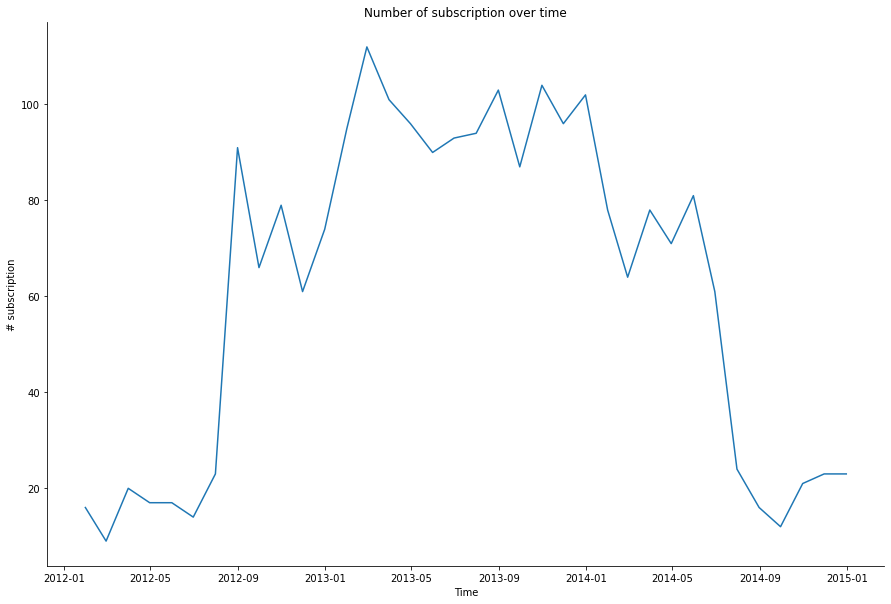

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(temp)
plt.title('Number of subscription over time')
plt.xlabel('Time')
plt.ylabel('# subscription')
sns.despine()
plt.show()

In [25]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age'],
      dtype='object')

Let's do some simple feature engineering on the datetime column and extract month and year.

In [26]:
df['Dt_MONTH'] = df['Dt_Customer'].dt.month
df['Dt_YEAR'] = df['Dt_Customer'].dt.year
df.drop(columns=['ID', 'Dt_Customer'], axis=1, inplace=True)

In [27]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Dt_MONTH,Dt_YEAR
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,60,4,2012
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,63,8,2014
2,Graduation,Married,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,52,8,2013
3,Graduation,Married,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,33,10,2014
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,36,1,2014


In [28]:
column_average = ['Income', 'Recency', 'MntWines', 'MntFruits', 
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

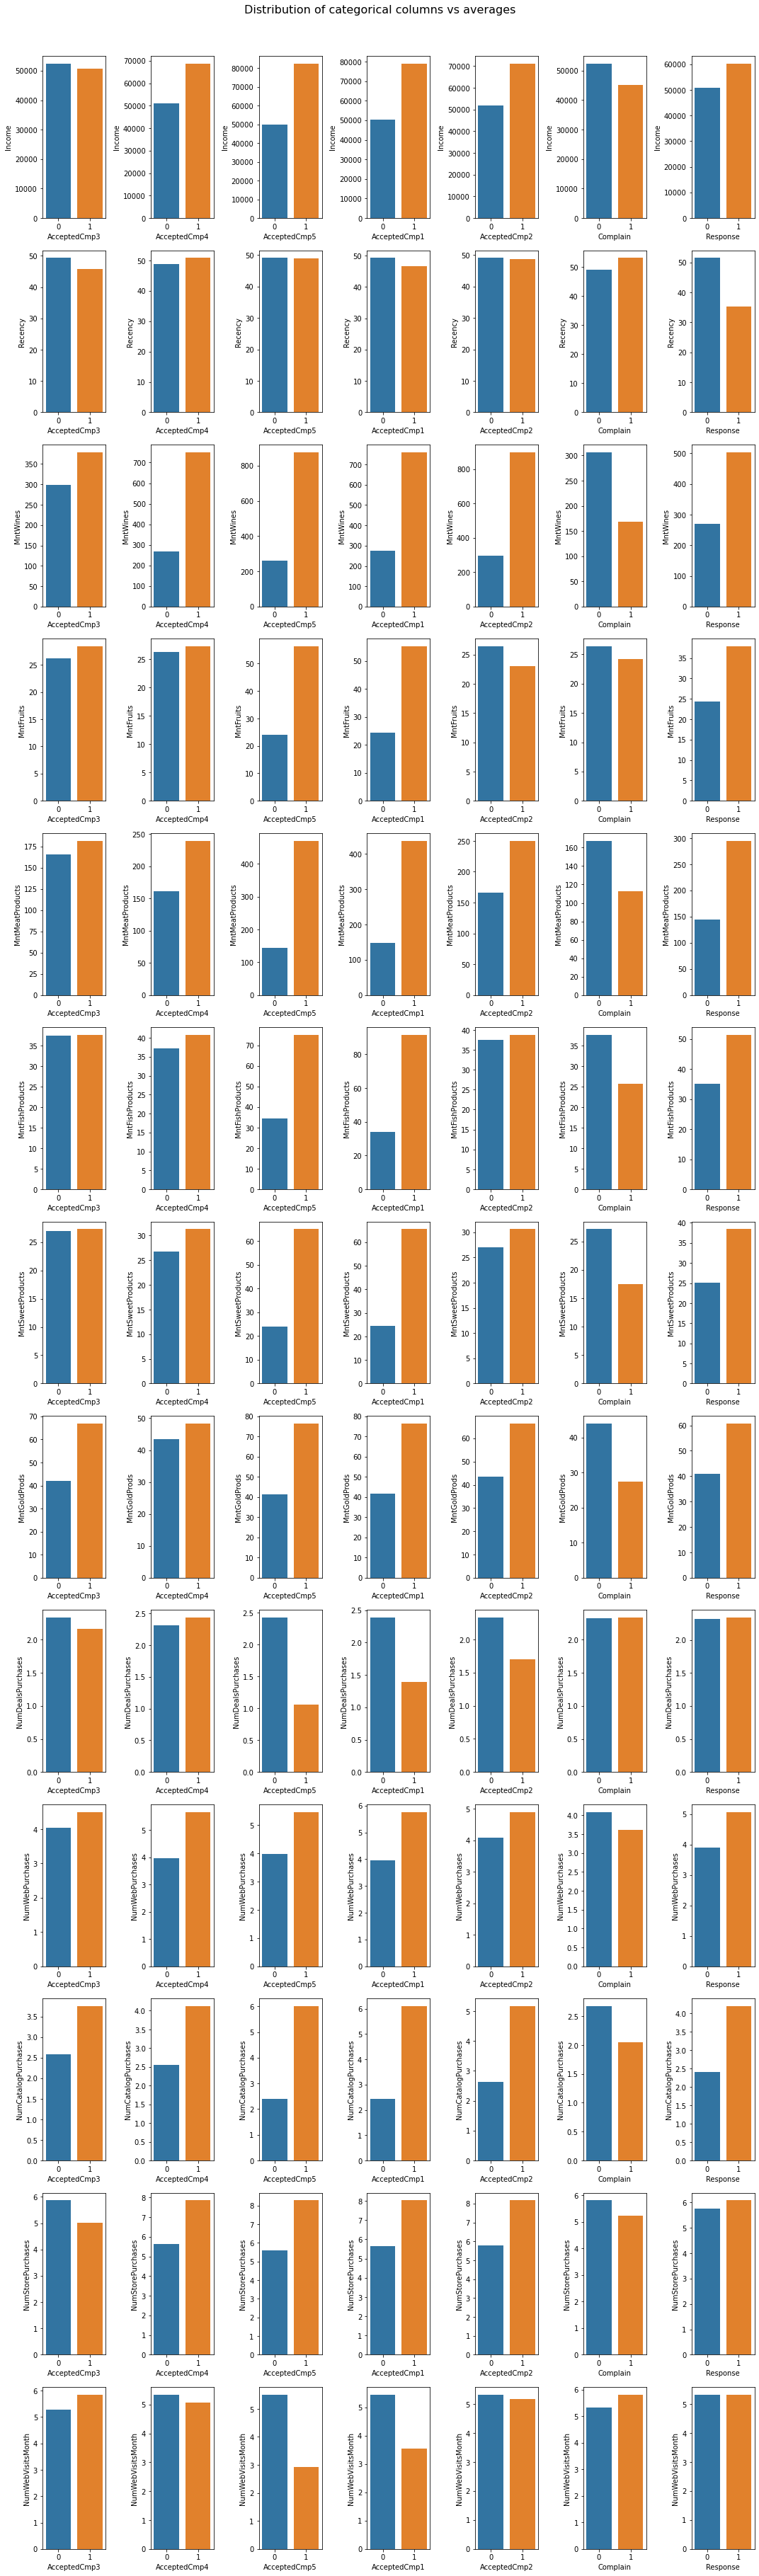

In [29]:
fig, axes = plt.subplots(13, 7, figsize=(15, 50))
for i, column in enumerate(column_average):
    for j, insight in enumerate(categories_for_insight):
        sns.barplot(ax=axes[i][j], y=df.groupby([insight])[column].mean(), x=df.groupby([insight])[column].mean().index)
fig.suptitle('Distribution of categorical columns vs averages', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

In [30]:
column_cat = ['Education', 'Marital_Status','Dt_MONTH', 'Dt_YEAR']

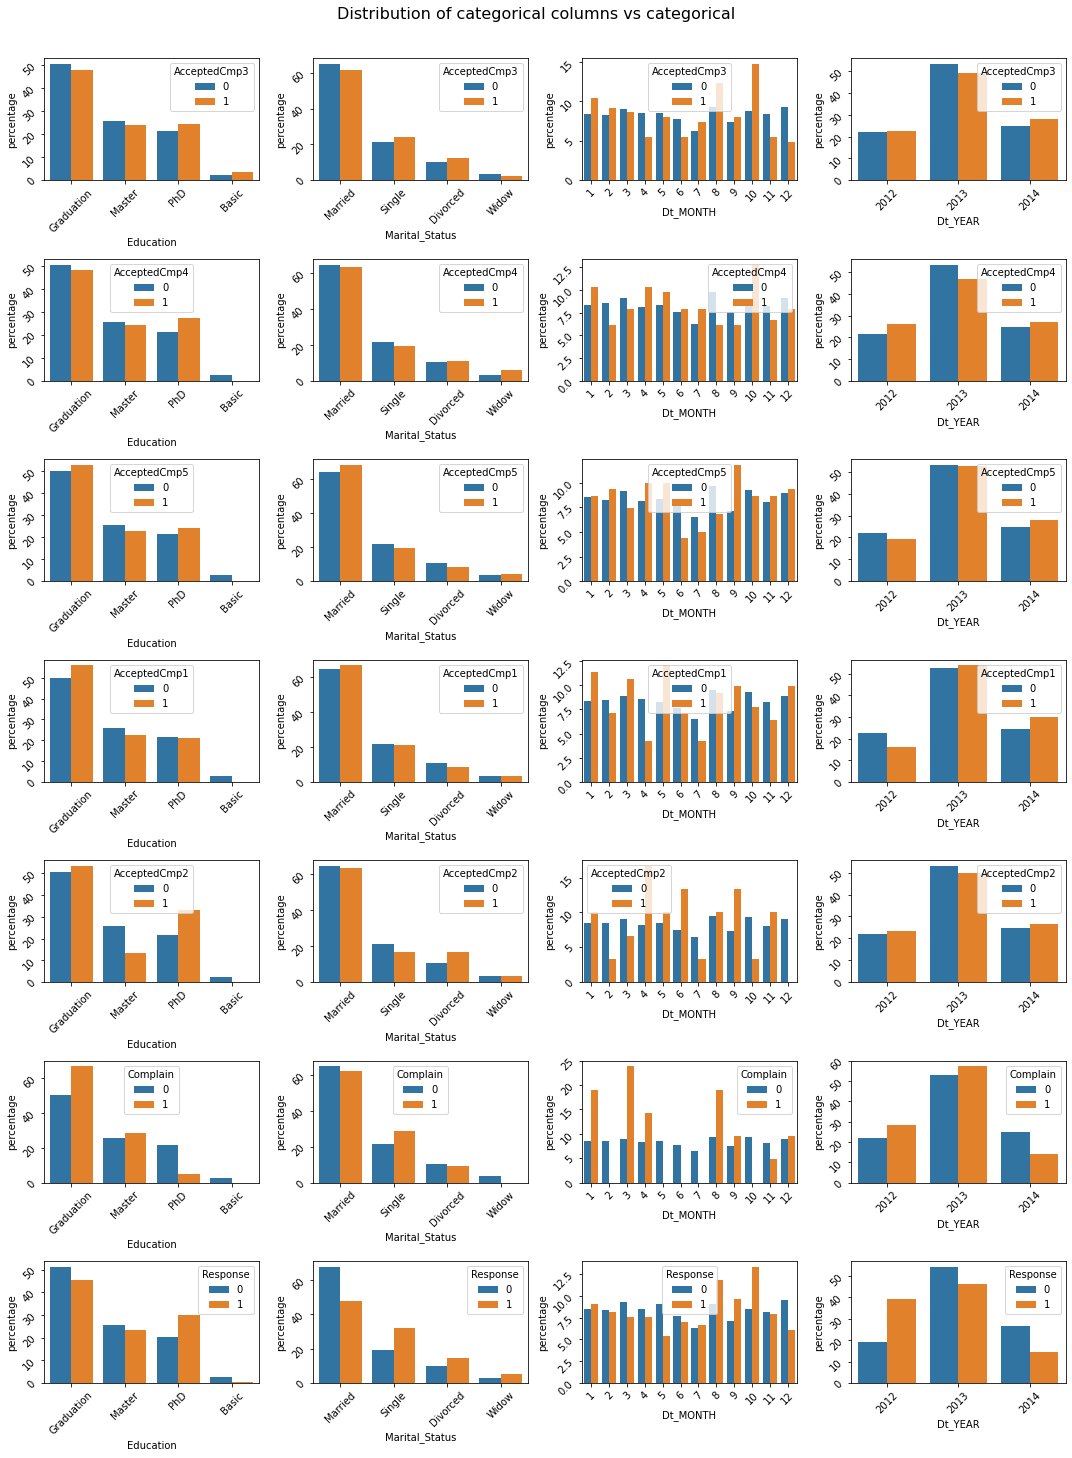

In [31]:
fig, axes = plt.subplots(7, 4, figsize=(15, 20))
for i, column in enumerate(column_cat):
    for j, insight in enumerate(categories_for_insight):
        temp_df = df.groupby([insight])[column].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
        sns.barplot(ax=axes[j][i], data=temp_df, x=column, y='percentage', hue=insight)
        axes[j][i].tick_params(rotation=45)
fig.suptitle('Distribution of categorical columns vs categorical', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

## More Feature Engineering

### Education Column and Marital Status column

In [32]:
# Instantiate OHE and drop one column for collinearity
ohe = OneHotEncoder(drop='first')
# OHE on columns Education and Marital Status
edu = df.loc[:, ['Education', 'Marital_Status']]
ohe_edu = ohe.fit_transform(edu)

In [33]:
edu

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Married
3,Graduation,Married
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Married
2237,Graduation,Divorced
2238,Master,Married


In [34]:
df_edu = pd.DataFrame(ohe_edu.toarray().astype(int), columns=ohe.get_feature_names_out(), dtype=int)
df_edu

,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1,0,0,0,1,0
1,1,0,0,0,1,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,1,1,0,0
...,...,...,...,...,...,...
2207,1,0,0,1,0,0
2208,0,0,1,1,0,0
2209,1,0,0,0,0,0
2210,0,1,0,1,0,0


In [35]:
df = pd.concat([df.reset_index(drop=True), df_edu], axis=1)

In [36]:
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Education', 'Marital_Status'], axis=1, inplace=True)

In [37]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Dt_MONTH,Dt_YEAR,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,60,4,2012,1,0,0,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,63,8,2014,1,0,0,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,52,8,2013,1,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,33,10,2014,1,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,36,1,2014,0,0,1,1,0,0


## Class Balance

Let's first check the class balance of our target column

In [38]:
balance = df['Response'].value_counts(normalize=True).mul(100).reset_index()

In [39]:
balance

,index,Response
0,0,85.036166
1,1,14.963834


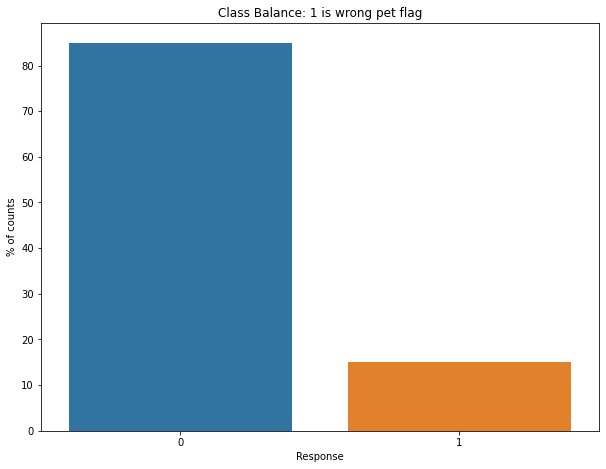

In [40]:
plt.figure(figsize=(10, 7.5))
sns.barplot(data=balance, x='index', y='Response')
plt.title('Class Balance: 1 is wrong pet flag')
plt.xlabel('Response')
plt.ylabel('% of counts')
plt.show()

The data is imbalanced. 85% is class 0 (didin't respond to the offer) while only 15% is class 1 (responsed).

We'll work with this later on. 

## Check Correlation

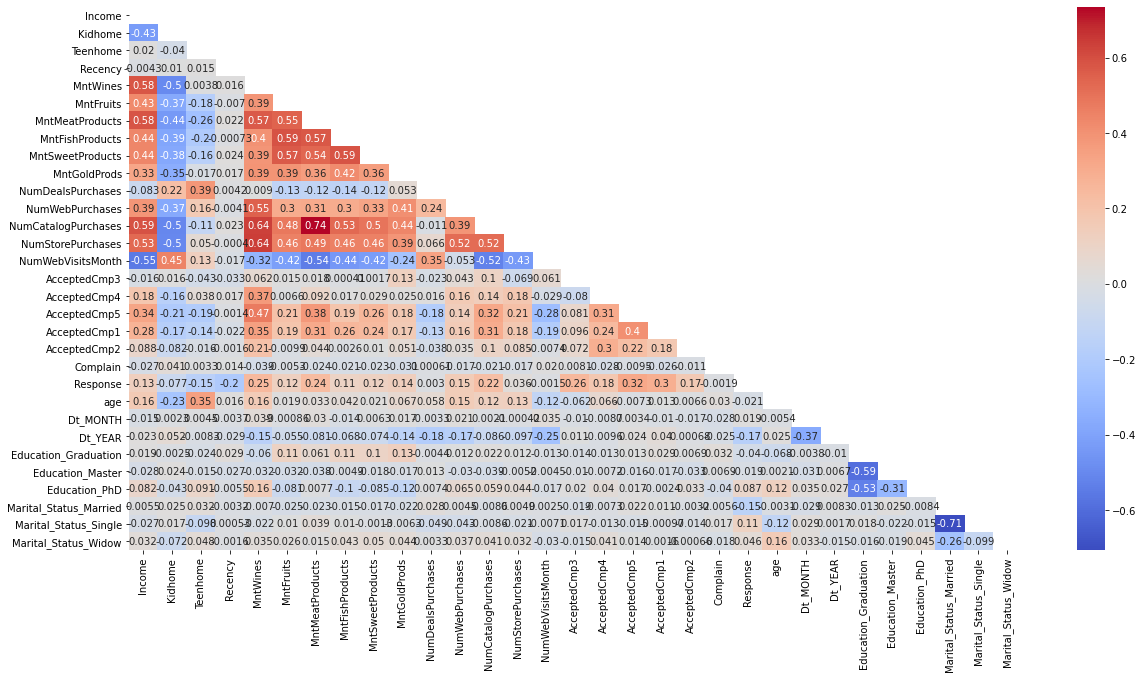

In [41]:
# Correlation between independent variables
corr = df.corr()
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

We can see some correlation between our target column (Response) and the other columns but nothing really strong.


## Split dataset

In [42]:
X = df.drop(columns='Response')
y = df['Response']

In [43]:
print(X.shape, y.shape)

(2212, 30) (2212,)


In [44]:
# Split the data with 33% to test and keepinf the same balance that we have in y (Target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

In [45]:
print(X_train.shape, y_train.shape)

(1482, 30) (1482,)


In [46]:
print(X_test.shape, y_test.shape)

(730, 30) (730,)


Let's get tid of the otliers

In [47]:
X_train.index

Int64Index([ 195,  780, 1288, 1466,  300,  776,  434, 2122,  148,   21,
            ...
             415,  299, 1855, 1035,  788,  461, 2123, 1024, 2175,  372],
           dtype='int64', length=1482)

## Isolating the Outliers

We'll now get rid of outliers on the train set.

Even though Kidhome, Teenhome and NumDealPurchases are numerical, they only have discrete values so we won't remove outliers fro this columns.

In [48]:
# Loop through columns
for column in list_to_plot:
    if column == 'Kidhome' or column == 'Teenhome' or column == 'NumDealsPurchases': 
        continue
    # Keep all data below 95% percentile of that for that column
    X_train = X_train[X_train[column] < X_train[column].quantile(0.95)]
    X_test = X_test[X_test[column] < X_test[column].quantile(0.95)]

In [49]:
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

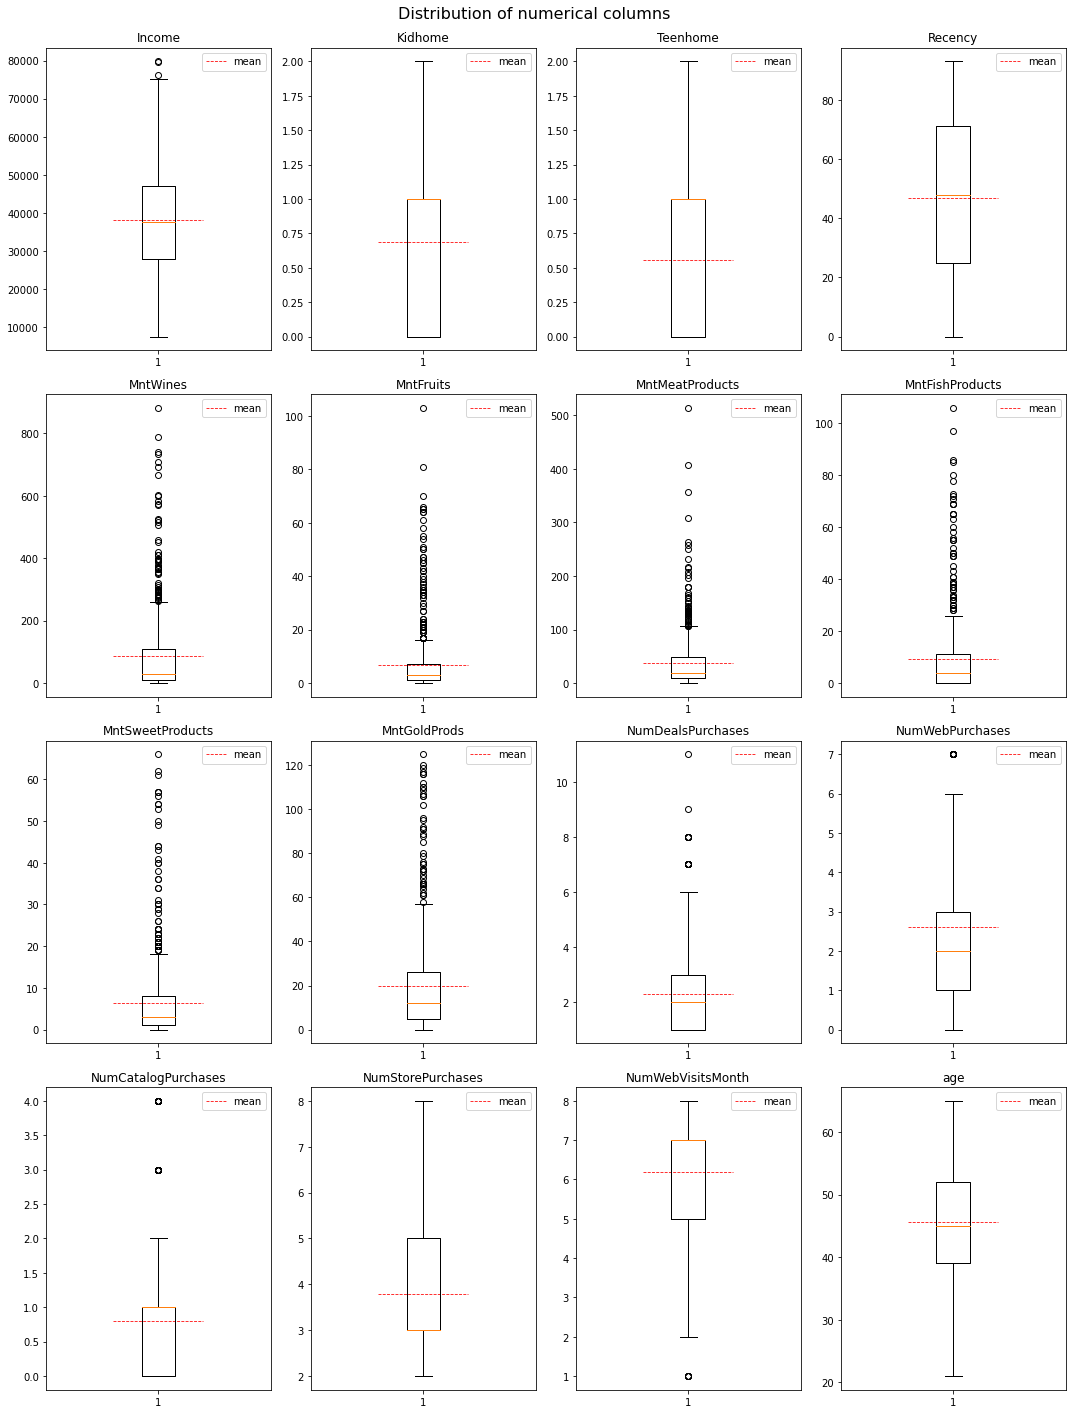

In [50]:
# Plot the column distributions
fig, axes = plt.subplots(4, 4, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(list_to_plot):
    axes[idx].boxplot(X_train[column])
    axes[idx].hlines(y=X_train[column].mean(), xmin=0.8, xmax=1.2, color='r', linestyle='dashed', linewidth=0.8, label='mean')
    axes[idx].set_title(column)
    axes[idx].legend()
fig.suptitle('Distribution of numerical columns \n', fontsize=16)
plt.tight_layout()
plt.show()

## Data Normalization

There is no need to normalize the data with decision tree, They are not affected by that.

## Decision Tree - Base

In [152]:
DT_model = DecisionTreeClassifier(class_weight='balanced')
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [153]:
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  0.9956709956709957
The TEST classification accuracy is:  0.8908554572271387


In [53]:
max_depths = np.arange(20)+1

train_scores = list()
test_scores = list()

# Explore values of tree depth
for max_depth in max_depths:

    # Instantiate
    my_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit
    my_tree.fit(X_train, y_train)

    # Score
    train_scores.append(my_tree.score(X_train, y_train))
    test_scores.append(my_tree.score(X_test, y_test))

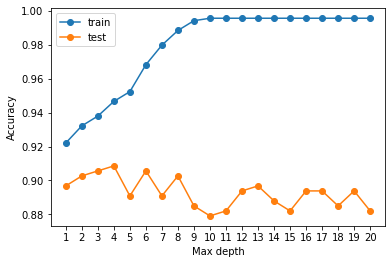

In [54]:
# Visualize
plt.figure()
plt.plot(max_depths, train_scores, label='train', marker='o')
plt.plot(max_depths, test_scores, label='test', marker='o')
plt.xticks(np.arange(20)+1)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A max_deph of 4 will ensure a model that is not overfit

## Making predictions and accuracy

In [132]:
DT_model = DecisionTreeClassifier(max_depth=4)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [133]:
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

In [134]:
train_acc = DT_model.score(X_train, y_train)

In [135]:
test_acc = DT_model.score(X_test, y_test)

In [136]:
print(f'The accuracy on the train set is {train_acc}')

The accuracy on the train set is 0.9466089466089466


In [137]:
print(f'The accuracy on the test set is {test_acc}')

The accuracy on the test set is 0.9085545722713865


In [138]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       639
           1       0.90      0.35      0.51        54

    accuracy                           0.95       693
   macro avg       0.93      0.67      0.74       693
weighted avg       0.94      0.95      0.94       693



In [139]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       304
           1       0.70      0.20      0.31        35

    accuracy                           0.91       339
   macro avg       0.81      0.60      0.63       339
weighted avg       0.89      0.91      0.88       339



We can see that the model has a good accuracy on both train and test sets. But that's not the best metric to evaluate the model. Both precision and recall are not very good on the test sets in predicting class 1. The model has a hard time to remember what is actually class 1.

## Confusion Matrix

In [140]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,301,3
Actual 1,28,7


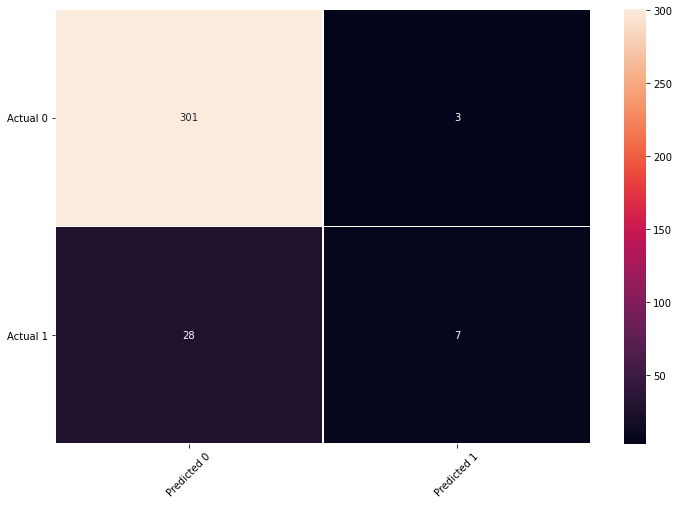

In [141]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

The model is really good in predicting class 0 but not class 1 which is the one we are more interested.

We will use two resampling methods to see if the model can be inproved: overampling and undersampling.

# Decision Tree - Over Sampling

In [65]:
# Initialize the model
sampler = SMOTE(sampling_strategy=0.5)

# Resample only train set
X_train_os, y_train_os = sampler.fit_resample(X_train, y_train)

In [66]:
balance = y_train_os.value_counts(normalize=True).mul(100).reset_index()
balance

,index,Response
0,0,66.701461
1,1,33.298539


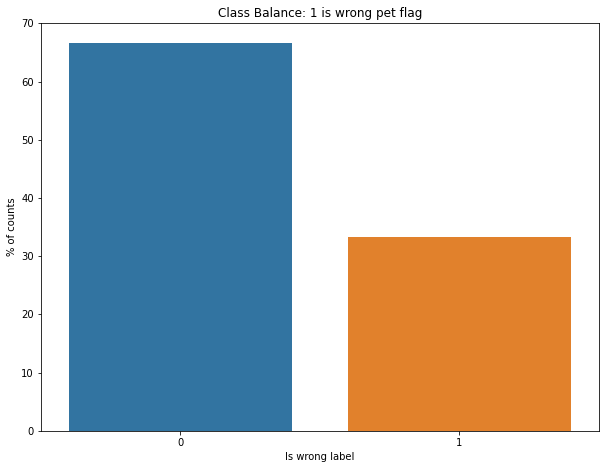

In [67]:
plt.figure(figsize=(10, 7.5))
sns.barplot(data=balance, x='index', y='Response')
plt.title('Class Balance: 1 is wrong pet flag')
plt.xlabel('Is wrong label')
plt.ylabel('% of counts')
plt.show()

In [68]:
print(X_train.shape, y_train.shape)

(693, 30) (693,)


In [69]:
print(X_train_os.shape, y_train_os.shape)

(958, 30) (958,)


We have a more balanced dataset and we have increase the number of observation (oversampled classe 1) from 687 to 925.

## Making predictions and accuracy

In [70]:
max_depths = np.arange(20)+1

train_scores = list()
test_scores = list()

# Explore values of tree depth
for max_depth in max_depths:

    # Instantiate
    my_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit
    my_tree.fit(X_train_os, y_train_os)

    # Score
    train_scores.append(my_tree.score(X_train_os, y_train_os))
    test_scores.append(my_tree.score(X_test, y_test))

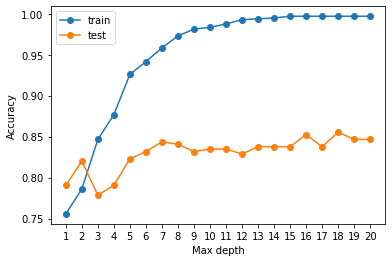

In [71]:
# Visualize
plt.figure()
plt.plot(max_depths, train_scores, label='train', marker='o')
plt.plot(max_depths, test_scores, label='test', marker='o')
plt.xticks(np.arange(20)+1)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A max_deph of 2 will ensure a model that is not overfit

In [142]:
DT_model_os = DecisionTreeClassifier(max_depth=2)
DT_model_os.fit(X_train_os, y_train_os)

DecisionTreeClassifier(max_depth=2)

In [143]:
y_train_os_pred = DT_model_os.predict(X_train_os)
y_test_pred = DT_model_os.predict(X_test)

In [144]:
train_os_acc = DT_model_os.score(X_train_os, y_train_os)

In [145]:
test_acc = DT_model_os.score(X_test, y_test)

In [146]:
print(f'The accuracy on the train set is {train_os_acc}')

The accuracy on the train set is 0.7860125260960334


In [147]:
print(f'The accuracy on the test set is {test_acc}')

The accuracy on the test set is 0.8200589970501475


In [148]:
print(classification_report(y_train_os, y_train_os_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       639
           1       0.75      0.54      0.63       319

    accuracy                           0.79       958
   macro avg       0.77      0.72      0.74       958
weighted avg       0.78      0.79      0.78       958



In [149]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       304
           1       0.19      0.23      0.21        35

    accuracy                           0.82       339
   macro avg       0.55      0.56      0.55       339
weighted avg       0.83      0.82      0.83       339



The model has lost a little bit on test accuracy but has a better recall score. That means that it's really good at remembering which ones are actual class 1. We have though a lower precision meaning that in order to predicting better class 1 is missclassifing a lot of actual class 0 (higher false positives FP). See confusion matrix below.

In [150]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,270,34
Actual 1,27,8


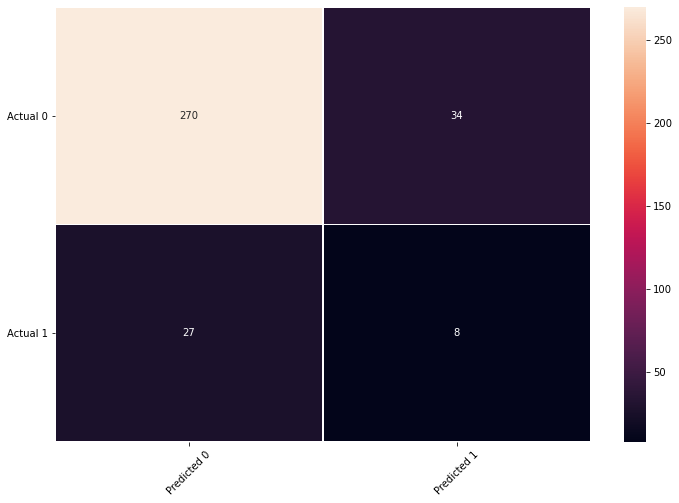

In [151]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# Decision Tree - Under Sampling

In [82]:
# Initialize the model
usampler = RandomUnderSampler(sampling_strategy=0.5)

# Resample only train set
X_train_us, y_train_us = usampler.fit_resample(X_train, y_train)

In [83]:
balance = y_train_us.value_counts(normalize=True).mul(100).reset_index()
balance

,index,Response
0,0,66.666667
1,1,33.333333


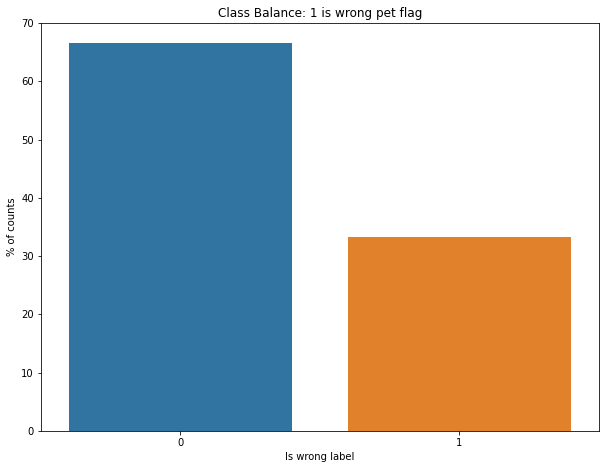

In [84]:
plt.figure(figsize=(10, 7.5))
sns.barplot(data=balance, x='index', y='Response')
plt.title('Class Balance: 1 is wrong pet flag')
plt.xlabel('Is wrong label')
plt.ylabel('% of counts')
plt.show()

In [85]:
print(X_train.shape, y_train.shape)

(693, 30) (693,)


In [86]:
print(X_train_us.shape, y_train_us.shape)

(162, 30) (162,)


We have a better class balance but this time we have reduced the number of observations from 687 to 210. We have undersampled class 1.

In [87]:
max_depths = np.arange(20)+1

train_scores = list()
test_scores = list()

# Explore values of tree depth
for max_depth in max_depths:

    # Instantiate
    my_tree = DecisionTreeClassifier(max_depth=max_depth)

    # Fit
    my_tree.fit(X_train_us, y_train_us)

    # Score
    train_scores.append(my_tree.score(X_train_us, y_train_us))
    test_scores.append(my_tree.score(X_test, y_test))

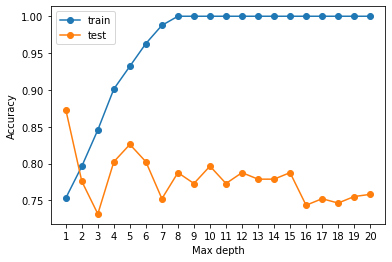

In [88]:
# Visualize
plt.figure()
plt.plot(max_depths, train_scores, label='train', marker='o')
plt.plot(max_depths, test_scores, label='test', marker='o')
plt.xticks(np.arange(20)+1)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A max_deph of 4 will ensure a model that is not overfit

In [89]:
DT_model_us = DecisionTreeClassifier(max_depth=4)
DT_model_us.fit(X_train_us, y_train_us)

DecisionTreeClassifier(max_depth=4)

In [90]:
y_train_us_pred = DT_model_us.predict(X_train_us)
y_test_pred = DT_model_us.predict(X_test)

In [91]:
train_us_acc = DT_model_us.score(X_train_us, y_train_us)

In [92]:
test_acc = DT_model_us.score(X_test, y_test)

In [93]:
print(f'The accuracy on the train set is {train_us_acc}')

The accuracy on the train set is 0.9012345679012346


In [94]:
print(f'The accuracy on the test set is {test_acc}')

The accuracy on the test set is 0.8023598820058997


In [95]:
print(classification_report(y_train_us, y_train_us_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       108
           1       0.90      0.80      0.84        54

    accuracy                           0.90       162
   macro avg       0.90      0.88      0.89       162
weighted avg       0.90      0.90      0.90       162



In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       304
           1       0.27      0.54      0.36        35

    accuracy                           0.80       339
   macro avg       0.61      0.69      0.62       339
weighted avg       0.87      0.80      0.83       339



The model has lost a little bit on test accuracy but has a better recall score. That means that it's really good at remembering which ones are actual class 1. We have though a lower precision meaning that in order to predicting better class 1 is missclassifing a lot of actual class 0 (higher false positives FP). See confusion matrix below.

In [97]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,253,51
Actual 1,16,19


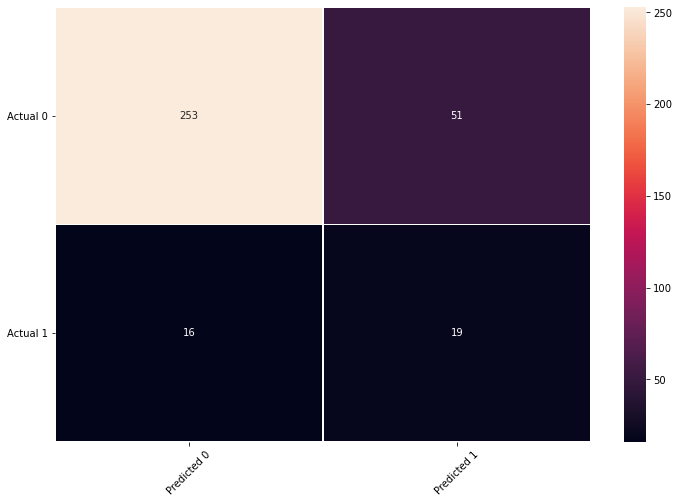

In [98]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# Pre-Pruning with hyperparameter tuning

In [99]:
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
grid_search=GridSearchCV(estimator=DT_model_os,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train_os,y_train_os)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [100]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 34, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}


In [123]:
DT_model_best = DecisionTreeClassifier(criterion='entropy', max_depth=34, min_samples_leaf=2, min_samples_split=6, splitter='random')
DT_model_best.fit(X_train_os, y_train_os)

DecisionTreeClassifier(criterion='entropy', max_depth=34, min_samples_leaf=2,
                       min_samples_split=6, splitter='random')

In [124]:
y_train_best_pred = DT_model_best.predict(X_train_os)
y_test_pred = DT_model_best.predict(X_test)

In [125]:
train_best_acc = DT_model_best.score(X_train_os, y_train_os)

In [126]:
test_acc = DT_model_best.score(X_test, y_test)

In [127]:
print(f'The accuracy on the train set is {train_best_acc}')

The accuracy on the train set is 0.9707724425887265


In [128]:
print(f'The accuracy on the test set is {test_acc}')

The accuracy on the test set is 0.8348082595870207


In [129]:
print(classification_report(y_train_os, y_train_best_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       639
           1       0.97      0.94      0.96       319

    accuracy                           0.97       958
   macro avg       0.97      0.96      0.97       958
weighted avg       0.97      0.97      0.97       958



In [130]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       304
           1       0.29      0.40      0.33        35

    accuracy                           0.83       339
   macro avg       0.61      0.64      0.62       339
weighted avg       0.86      0.83      0.85       339



The model has lost a little bit on test accuracy but has a better recall score. That means that it's really good at remembering which ones are actual class 1. We have though a lower precision meaning that in order to predicting better class 1 is missclassifing a lot of actual class 0 (higher false positives FP). See confusion matrix below.

In [131]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,269,35
Actual 1,21,14


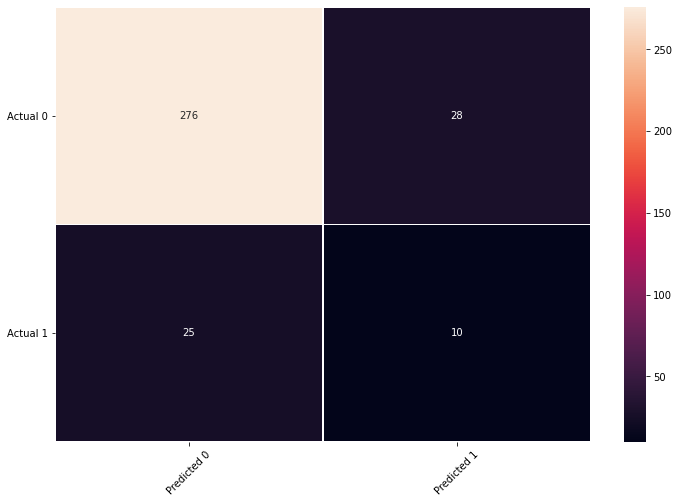

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# Ensamble methods

## XGBOOST

In [111]:
XGB_model = XGBClassifier(use_label_encoder=False, eta=0.1, objective='reg:squarederror', max_depth=3)
XGB_model.fit(X_train_os, y_train_os)
print(f"XG Boost score TRAIN SET: {XGB_model.score(X_train_os, y_train_os)}")
print(f"XG Boost score TEST SET: {XGB_model.score(X_test, y_test)}")

XG Boost score TRAIN SET: 0.9874739039665971
XG Boost score TEST SET: 0.8849557522123894


In [112]:
y_train_XGB_pred = XGB_model.predict(X_train_os)
y_test_pred = XGB_model.predict(X_test)

In [113]:
print(classification_report(y_train_os, y_train_XGB_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       639
           1       0.99      0.97      0.98       319

    accuracy                           0.99       958
   macro avg       0.99      0.98      0.99       958
weighted avg       0.99      0.99      0.99       958



In [114]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       304
           1       0.43      0.34      0.38        35

    accuracy                           0.88       339
   macro avg       0.68      0.65      0.66       339
weighted avg       0.87      0.88      0.88       339



In [115]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,288,16
Actual 1,23,12


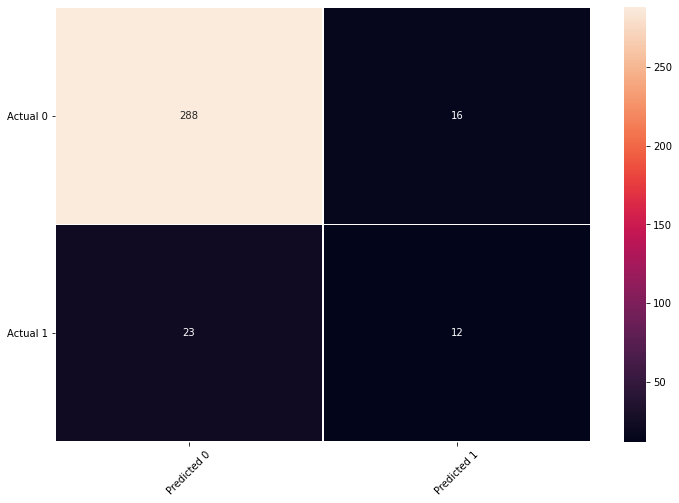

In [116]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

## Random Forest

In [117]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train_os, y_train_os)
print(f"XG Boost score TRAIN SET: {RF_model.score(X_train_os, y_train_os)}")
print(f"XG Boost score TEST SET: {RF_model.score(X_test, y_test)}")

XG Boost score TRAIN SET: 0.9968684759916493
XG Boost score TEST SET: 0.8820058997050148


In [118]:
y_train_RF_pred = RF_model.predict(X_train_os)
y_test_pred = RF_model.predict(X_test)

In [119]:
print(classification_report(y_train_os, y_train_RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       639
           1       1.00      0.99      1.00       319

    accuracy                           1.00       958
   macro avg       1.00      1.00      1.00       958
weighted avg       1.00      1.00      1.00       958



In [120]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       304
           1       0.38      0.23      0.29        35

    accuracy                           0.88       339
   macro avg       0.65      0.59      0.61       339
weighted avg       0.86      0.88      0.87       339



In [121]:
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
confusion_df.index = ['Actual 0', 'Actual 1']
confusion_df.columns = ['Predicted 0', 'Predicted 1']
confusion_df

,Predicted 0,Predicted 1
Actual 0,291,13
Actual 1,27,8


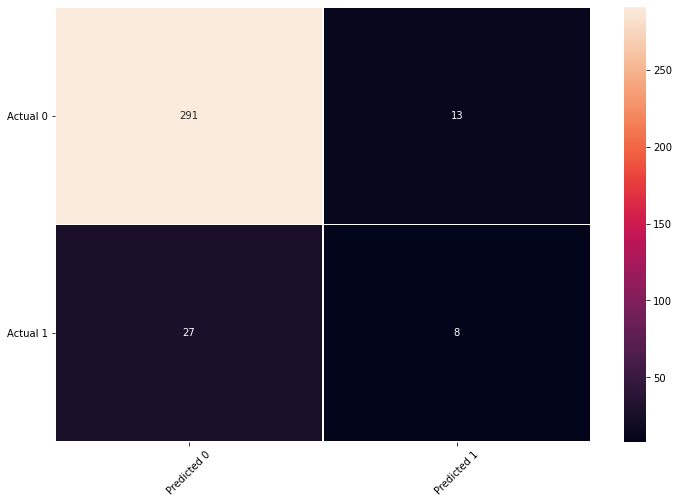

In [122]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', linewidths=0.5) 
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()